## Using the GFF3 file that is well annotated, do:


#### W5-H17: Visualize the data as much as you can. How many genes/CDS/exon are listed for ENSEMBL and other datasets?


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__ 
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'] 
df = pd.read_csv('../datasets/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [76]:
df.head(5)

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine


In [77]:
df.type.unique()

array(['chromosome', 'biological_region', 'gene', 'processed_transcript',
       'exon', 'pseudogenic_transcript', 'pseudogene', 'miRNA_gene',
       'miRNA', 'lincRNA_gene', 'lincRNA', 'transcript', 'CDS',
       'processed_pseudogene', 'snRNA_gene', 'snRNA', 'five_prime_UTR',
       'three_prime_UTR', 'aberrant_processed_transcript',
       'NMD_transcript_variant', 'RNA', 'snoRNA_gene', 'snoRNA',
       'rRNA_gene', 'rRNA', 'V_gene_segment', 'C_gene_segment',
       'J_gene_segment', 'VD_gene_segment', 'supercontig', 'mt_gene'],
      dtype=object)

In [78]:
df['type'].value_counts()

exon                             1182163
CDS                               704604
biological_region                 182510
five_prime_UTR                    142387
three_prime_UTR                   133938
transcript                         96412
gene                               42485
processed_transcript               28228
aberrant_processed_transcript      26944
NMD_transcript_variant             13761
lincRNA                            13247
processed_pseudogene               10722
lincRNA_gene                        7533
pseudogene                          3049
RNA                                 2221
snRNA                               1909
snRNA_gene                          1909
miRNA                               1869
miRNA_gene                          1567
snoRNA                               956
snoRNA_gene                          944
pseudogenic_transcript               737
rRNA_gene                            549
rRNA                                 549
V_gene_segment  

In [79]:
gdf = df[df.type == 'gene']
cdf = df[df.type == 'CDS']
edf = df[df.type == 'exon']

In [80]:
len(gdf)

42485

In [81]:
len(cdf)

704604

In [82]:
len(edf)

1182163

In [83]:
row_gdf = gdf.shape[0]
row_cdf = cdf.shape[0]
row_edf = edf.shape[0]

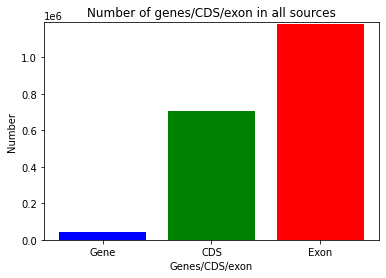

In [84]:
labels = ['gdf', 'cdf', 'edf']
values = [row_gdf, row_cdf, row_edf]
colors = ['blue', 'green', 'red']
plt.bar(labels, values, color= colors)
plt.title('Number of genes/CDS/exon in all sources')
plt.xlabel('Genes/CDS/exon')
x_labels = ['Gene', 'CDS', 'Exon']
plt.xticks(labels, x_labels)
plt.ylabel('Number')
plt.ylim(0, max(values) + 10000);

In [85]:
df.source.unique()

array(['GRCh38', '.', 'havana', 'mirbase', 'ensembl_havana', 'ensembl',
       'insdc'], dtype=object)

In [86]:
grch38 = df[df.source == 'GRCh38']
grch38.type.unique()
#no gene,CDS,exon in this source

array(['chromosome', 'supercontig'], dtype=object)

In [87]:
dot = df[df.source == '.']
dot.type.unique()
#no gene,CDS,exon in this source

array(['biological_region'], dtype=object)

In [88]:
havana = df[df.source == 'havana']
havana.type.unique()

array(['gene', 'processed_transcript', 'exon', 'pseudogenic_transcript',
       'pseudogene', 'lincRNA_gene', 'lincRNA', 'processed_pseudogene',
       'transcript', 'aberrant_processed_transcript', 'five_prime_UTR',
       'CDS', 'three_prime_UTR', 'NMD_transcript_variant',
       'V_gene_segment', 'J_gene_segment', 'C_gene_segment',
       'VD_gene_segment', 'snRNA_gene', 'snRNA'], dtype=object)

In [89]:
havana_g = havana[havana.type == 'gene']
len(havana_g)

23073

In [90]:
havana_c = havana[havana.type == 'CDS']
len(havana_c)

368091

In [91]:
havana_e = havana[havana.type == 'exon']
len(havana_e)

807505

In [92]:
mirbase = df[df.source == 'mirbase']
mirbase.type.unique()

array(['miRNA_gene', 'miRNA', 'exon'], dtype=object)

In [93]:
mirbase_e = mirbase[mirbase.type == 'exon']
len(mirbase_e)

1567

In [94]:
ensembl_havana = df[df.source == 'ensembl_havana']
ensembl_havana.type.unique()

array(['lincRNA_gene', 'lincRNA', 'miRNA', 'gene', 'transcript', 'exon',
       'CDS', 'processed_transcript', 'aberrant_processed_transcript',
       'three_prime_UTR', 'five_prime_UTR', 'NMD_transcript_variant',
       'pseudogene', 'processed_pseudogene', 'pseudogenic_transcript',
       'V_gene_segment', 'C_gene_segment', 'snoRNA_gene', 'snoRNA'],
      dtype=object)

In [95]:
ensembl_havana_e = ensembl_havana[ensembl_havana.type == 'exon']
len(ensembl_havana_e)

268822

In [96]:
ensembl_havana_c = ensembl_havana[ensembl_havana.type == 'CDS']
len(ensembl_havana_c)

248313

In [97]:
ensembl_havana_g = ensembl_havana[ensembl_havana.type == 'gene']
len(ensembl_havana_g)

19064

In [98]:
ensembl = df[df.source == 'ensembl']
ensembl.type.unique()

array(['exon', 'snRNA_gene', 'snRNA', 'gene', 'transcript',
       'five_prime_UTR', 'CDS', 'three_prime_UTR', 'RNA', 'snoRNA_gene',
       'snoRNA', 'rRNA_gene', 'rRNA', 'pseudogene', 'lincRNA_gene',
       'lincRNA', 'processed_pseudogene'], dtype=object)

In [99]:
ensembl_e = ensembl[ensembl.type == 'exon']
len(ensembl_e)

104269

In [100]:
ensembl_c = ensembl[ensembl.type == 'CDS']
len(ensembl_c)

88200

In [101]:
ensembl_g = ensembl[ensembl.type == 'gene']
len(ensembl_g)

333

In [102]:
insdc = df[df.source == 'insdc']
insdc.type.unique()

array(['mt_gene', 'transcript', 'gene'], dtype=object)

In [103]:
insdc_g = insdc[insdc.type == 'gene']
len(insdc_g)

15

#### W5-H18: Plot a histogram of length information for a) entire genome, 2) for each source, i.e., ENSEMBL, Havana, etc. separately (can use subplot)

In [104]:
df.source.unique()

array(['GRCh38', '.', 'havana', 'mirbase', 'ensembl_havana', 'ensembl',
       'insdc'], dtype=object)

In [105]:
#Start by making a database from the original data that only contains the type as exons. 
edf = df[df.type == 'exon']
edf.head(5)

,seqid,source,type,start,end,score,strand,phase,attributes
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...


In [106]:
edf.drop('attributes', axis=1, inplace=True)
edf.drop('score', axis=1, inplace=True) 
edf.drop('strand', axis=1, inplace=True) 
edf.drop('phase', axis=1, inplace=True) 
edf.head(5)

/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,seqid,source,type,start,end
18,1,havana,exon,11869,12227
19,1,havana,exon,12613,12721
20,1,havana,exon,13221,14409
22,1,havana,exon,12010,12057
23,1,havana,exon,12179,12227


In [107]:
#Add in length column for exons 
edf['length'] = edf.end - edf.start + 1 
edf.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,seqid,source,type,start,end,length
18,1,havana,exon,11869,12227,359
19,1,havana,exon,12613,12721,109
20,1,havana,exon,13221,14409,1189
22,1,havana,exon,12010,12057,48
23,1,havana,exon,12179,12227,49


In [108]:
edf.source.unique()

array(['havana', 'mirbase', 'ensembl', 'ensembl_havana'], dtype=object)

1. Histogram for the Entire Genome 

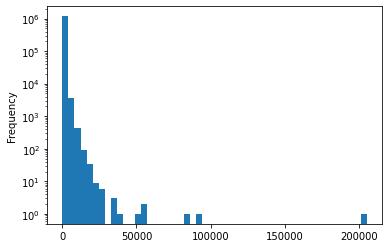

In [109]:
import matplotlib.pyplot as plt

edf.length.plot(kind='hist', bins=50, logy=True)
plt.show()

2. Histogram for: 'havana', 'mirbase', 'ensembl', 'ensembl_havana'

In [110]:
havana = edf[edf.source == 'havana']
havana.head(5)

,seqid,source,type,start,end,length
18,1,havana,exon,11869,12227,359
19,1,havana,exon,12613,12721,109
20,1,havana,exon,13221,14409,1189
22,1,havana,exon,12010,12057,48
23,1,havana,exon,12179,12227,49


In [111]:
mirbase = edf[edf.source == 'mirbase']
mirbase.head(5)

,seqid,source,type,start,end,length
44,1,mirbase,exon,17369,17436,68
256,1,mirbase,exon,187891,187958,68
475,1,mirbase,exon,632325,632413,89
2346,1,mirbase,exon,1167104,1167198,95
2350,1,mirbase,exon,1167863,1167952,90


In [112]:
ensembl = edf[edf.source == 'ensembl']
ensembl.head(5)

,seqid,source,type,start,end,length
60,1,ensembl,exon,30366,30503,138
97,1,ensembl,exon,120725,120869,145
98,1,ensembl,exon,120874,120932,59
99,1,ensembl,exon,129055,129223,169
100,1,ensembl,exon,133374,133723,350


In [113]:
ensembl_havana = edf[edf.source == 'ensembl_havana']
ensembl_havana.head(5)

,seqid,source,type,start,end,length
79,1,ensembl_havana,exon,69091,70008,918
380,1,ensembl_havana,exon,450740,451678,939
493,1,ensembl_havana,exon,685716,686654,939
1243,1,ensembl_havana,exon,944204,944800,597
1245,1,ensembl_havana,exon,945057,945146,90


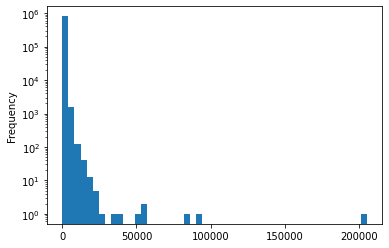

In [114]:
havana.length.plot(kind='hist', bins=50, logy=True)
plt.show()

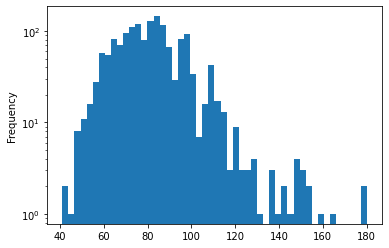

In [115]:
mirbase.length.plot(kind='hist', bins=50, logy=True)
plt.show()

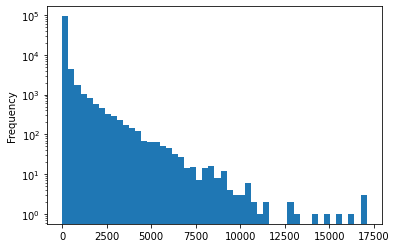

In [116]:
ensembl.length.plot(kind='hist', bins=50, logy=True)
plt.show()

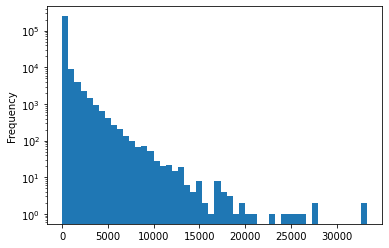

In [117]:
ensembl_havana.length.plot(kind='hist', bins=50, logy=True)
plt.show()

#### W5-H19: Parse the description column: Anything you can visualize? Visualize at least one thing.

In [118]:
gdf = df[df.type == 'gene']
gdf.head(5)

,seqid,source,type,start,end,score,strand,phase,attributes
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...


In [119]:
import re

RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);') 
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group('gene_name')

gdf['gene_name'] = gdf.attributes.apply(extract_gene_name)
gdf

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,seqid,source,type,start,end,score,strand,phase,attributes,gene_name
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...,DDX11L1
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...,WASH7P
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...,OR4G4P
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...,OR4G11P
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...,OR4F5
...,...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,ID=gene:ENSG00000224240;Name=CYCSP49;biotype=p...,CYCSP49
2601821,Y,havana,gene,26586642,26591601,.,-,.,ID=gene:ENSG00000227629;Name=SLC25A15P1;biotyp...,SLC25A15P1
2601826,Y,havana,gene,26594851,26634652,.,-,.,ID=gene:ENSG00000237917;Name=PARP4P1;biotype=u...,PARP4P1
2601841,Y,havana,gene,26626520,26627159,.,-,.,ID=gene:ENSG00000231514;Name=FAM58CP;biotype=p...,FAM58CP


In [120]:
RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    return res.group('gene_id')

gdf['gene_id'] = gdf.attributes.apply(extract_gene_id)
gdf

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,seqid,source,type,start,end,score,strand,phase,attributes,gene_name,gene_id
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...,DDX11L1,ENSG00000223972
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...,WASH7P,ENSG00000227232
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...,OR4G4P,ENSG00000268020
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...,OR4G11P,ENSG00000240361
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...,OR4F5,ENSG00000186092
...,...,...,...,...,...,...,...,...,...,...,...
2601818,Y,havana,gene,26549425,26549743,.,+,.,ID=gene:ENSG00000224240;Name=CYCSP49;biotype=p...,CYCSP49,ENSG00000224240
2601821,Y,havana,gene,26586642,26591601,.,-,.,ID=gene:ENSG00000227629;Name=SLC25A15P1;biotyp...,SLC25A15P1,ENSG00000227629
2601826,Y,havana,gene,26594851,26634652,.,-,.,ID=gene:ENSG00000237917;Name=PARP4P1;biotype=u...,PARP4P1,ENSG00000237917
2601841,Y,havana,gene,26626520,26627159,.,-,.,ID=gene:ENSG00000231514;Name=FAM58CP;biotype=p...,FAM58CP,ENSG00000231514


In [121]:
RE_GENE_DESC = re.compile(r'description=(?P<description>.+?);')
def extract_gene_desc(attributes_str):
    res = RE_GENE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('description')

gdf['description'] = gdf.attributes.apply(extract_gene_desc)
gdf.head(5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,seqid,source,type,start,end,score,strand,phase,attributes,gene_name,gene_id,description
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...


In [122]:
gdf.drop('attributes', axis=1, inplace=True)
gdf.drop('score', axis=1, inplace=True) 
gdf.drop('strand', axis=1, inplace=True) 
gdf.drop('phase', axis=1, inplace=True) 
gdf.head()

/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,seqid,source,type,start,end,gene_name,gene_id,description
16,1,havana,gene,11869,14409,DDX11L1,ENSG00000223972,DEAD/H-box helicase 11 like 1 [Source:HGNC Sym...
28,1,havana,gene,14404,29570,WASH7P,ENSG00000227232,WAS protein family homolog 7 pseudogene [Sourc...
71,1,havana,gene,52473,53312,OR4G4P,ENSG00000268020,olfactory receptor family 4 subfamily G member...
74,1,havana,gene,62948,63887,OR4G11P,ENSG00000240361,olfactory receptor family 4 subfamily G member...
77,1,ensembl_havana,gene,69091,70008,OR4F5,ENSG00000186092,olfactory receptor family 4 subfamily F member...


In [123]:
gdf.description.unique()

array(['DEAD/H-box helicase 11 like 1 [Source:HGNC Symbol%3BAcc:HGNC:37102]',
       'WAS protein family homolog 7 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38034]',
       'olfactory receptor family 4 subfamily G member 4 pseudogene [Source:HGNC Symbol%3BAcc:HGNC:14822]',
       ...,
       'poly(ADP-ribose) polymerase family member 4 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:18500]',
       'family with sequence similarity 58 member C%2C pseudogene [Source:HGNC Symbol%3BAcc:HGNC:38436]',
       'C-terminal binding protein 2 pseudogene 1 [Source:HGNC Symbol%3BAcc:HGNC:23940]'],
      dtype=object)

In [124]:
gdf.description.value_counts()

                                                                                                             13871
Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]                                                     6
Small Cajal body specific RNA 16 [Source:RFAM%3BAcc:RF00424]                                                     5
small Cajal body-specific RNA 17 [Source:RFAM%3BAcc:RF00492]                                                     4
Small Cajal body specific RNA 15 [Source:RFAM%3BAcc:RF00426]                                                     4
                                                                                                             ...  
MANEA antisense RNA 1 (head to head) [Source:HGNC Symbol%3BAcc:HGNC:43732]                                       1
MAGE family member D4 [Source:HGNC Symbol%3BAcc:HGNC:23793]                                                      1
splicing factor 3b subunit 3 [Source:HGNC Symbol%3BAcc:HGNC:10770]              

In [125]:
gdf_parse= gdf.groupby('description').count().iloc[:, 0].sort_values().iloc[::-1]
gdf_parse.head(100)

description
                                                                       13871
Small Cajal body specific RNA 20 [Source:RFAM%3BAcc:RF00601]               6
Small Cajal body specific RNA 16 [Source:RFAM%3BAcc:RF00424]               5
small Cajal body-specific RNA 17 [Source:RFAM%3BAcc:RF00492]               4
Small Cajal body specific RNA 15 [Source:RFAM%3BAcc:RF00426]               4
                                                                       ...  
cell division cycle 25B [Source:HGNC Symbol%3BAcc:HGNC:1726]               1
cell division cycle 25C [Source:HGNC Symbol%3BAcc:HGNC:1727]               1
cell adhesion molecule L1 like [Source:HGNC Symbol%3BAcc:HGNC:1939]        1
cell adhesion molecule 4 [Source:HGNC Symbol%3BAcc:HGNC:30825]             1
cell adhesion molecule 3 [Source:HGNC Symbol%3BAcc:HGNC:17601]             1
Name: seqid, Length: 100, dtype: int64

In [126]:
most_common_count = gdf_parse.iloc[0]
most_common_count

13871

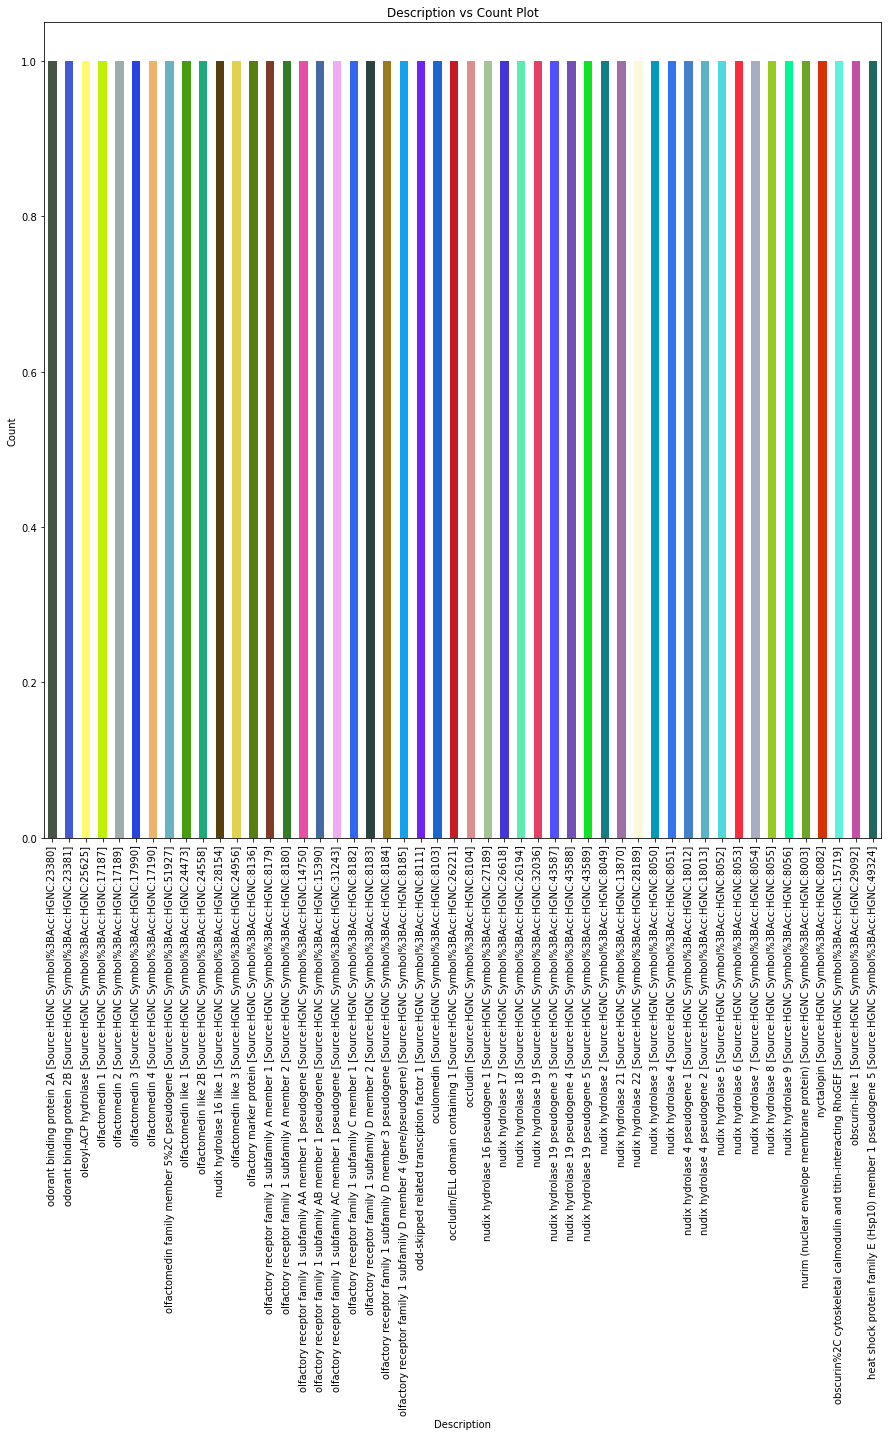

In [127]:
#plotting the least common descriptions 
import random

ran_colors = [f'#{hex(random.randint(0, 0xFFFFFF))[2:].zfill(6)}' for i in range(50)]
gdf_parse.tail(50).plot(kind='bar', x='description', y='count', color=ran_colors, figsize=(15, 15))
plt.xlabel('Description')
plt.ylabel('Count')
plt.title('Description vs Count Plot')
plt.show()

#### W5-H20: Based on our dataset, how many transcripts does a gene typically have? What percentage of genes have more than 1 transcript? Hint: You will need to sum up the exon lengths to get the transcripts. You can use external libraries. 

Resources to check out
1. https://daler.github.io/gffutils/
2. http://seqanswers.com/forums/showthread.php?t=4914

See also

   #### [The GFF spec can be found here](https://www.sanger.ac.uk/resources/software/gff/spec.html)
   #### [A great explanation on the GFF format can be found here](http://gmod.org/wiki/GFF3)

In [128]:
df.type.unique()

array(['chromosome', 'biological_region', 'gene', 'processed_transcript',
       'exon', 'pseudogenic_transcript', 'pseudogene', 'miRNA_gene',
       'miRNA', 'lincRNA_gene', 'lincRNA', 'transcript', 'CDS',
       'processed_pseudogene', 'snRNA_gene', 'snRNA', 'five_prime_UTR',
       'three_prime_UTR', 'aberrant_processed_transcript',
       'NMD_transcript_variant', 'RNA', 'snoRNA_gene', 'snoRNA',
       'rRNA_gene', 'rRNA', 'V_gene_segment', 'C_gene_segment',
       'J_gene_segment', 'VD_gene_segment', 'supercontig', 'mt_gene'],
      dtype=object)

In [129]:
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'] 
df = pd.read_csv('../datasets/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)
df.head(5)

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine


In [130]:
exon_df = df[df.type == 'exon']

In [131]:
exon_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...


In [132]:
len(exon_df)

1182163

In [133]:
exon_df.attributes.values[23766].split(';')

['Parent=transcript:ENST00000527513',
 'Name=ENSE00003472752',
 'constitutive=0',
 'ensembl_end_phase=2',
 'ensembl_phase=-1',
 'exon_id=ENSE00003472752',
 'rank=1',
 'version=1']

In [134]:
exon_df['length'] = exon_df.end - exon_df.start + 1 
exon_df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,seqid,source,type,start,end,score,strand,phase,attributes,length
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,359
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,109
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,1189
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,48
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,49


In [135]:
exon_df.length.sum()

294406476

In [136]:
import re

RE_GENE_NAME = re.compile(r'Parent=transcript:(\w+)') 
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    return res.group(1)

exon_df['transcript_id'] = exon_df.attributes.apply(extract_gene_name)
exon_df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,seqid,source,type,start,end,score,strand,phase,attributes,length,transcript_id
18,1,havana,exon,11869,12227,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,359,ENST00000456328
19,1,havana,exon,12613,12721,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,109,ENST00000456328
20,1,havana,exon,13221,14409,.,+,.,Parent=transcript:ENST00000456328;Name=ENSE000...,1189,ENST00000456328
22,1,havana,exon,12010,12057,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,48,ENST00000450305
23,1,havana,exon,12179,12227,.,+,.,Parent=transcript:ENST00000450305;Name=ENSE000...,49,ENST00000450305
...,...,...,...,...,...,...,...,...,...,...,...
2601838,Y,havana,exon,26630647,26630749,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE000...,103,ENST00000435945
2601839,Y,havana,exon,26633345,26633431,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE000...,87,ENST00000435945
2601840,Y,havana,exon,26634523,26634652,.,-,.,Parent=transcript:ENST00000435945;Name=ENSE000...,130,ENST00000435945
2601843,Y,havana,exon,26626520,26627159,.,-,.,Parent=transcript:ENST00000435741;Name=ENSE000...,640,ENST00000435741


In [137]:
grouped = exon_df.groupby("transcript_id")["length"].sum().reset_index()
grouped = grouped.rename(columns={"length": "total_length"})

In [138]:
grouped

,transcript_id,total_length
0,ENST00000000233,1103
1,ENST00000000412,2756
2,ENST00000000442,2215
3,ENST00000001008,3732
4,ENST00000001146,4732
...,...,...
197997,ENST00000638161,668
197998,ENST00000638162,2433
197999,ENST00000638163,528
198000,ENST00000638164,713


In [139]:
grouped_sorted = grouped.sort_values(by="total_length")
grouped_sorted.head(10)

,transcript_id,total_length
41488,ENST00000415118,8
54082,ENST00000434970,9
57186,ENST00000439842,11
194822,ENST00000632684,12
62898,ENST00000448914,13
51860,ENST00000431440,16
41317,ENST00000414852,16
52120,ENST00000431870,16
64266,ENST00000451044,17
51217,ENST00000430425,17


In [140]:
grouped.total_length.describe()

count    198002.000000
mean       1486.886375
std        1894.989426
min           8.000000
25%         550.000000
50%         785.000000
75%        1877.000000
max      205012.000000
Name: total_length, dtype: float64

In [142]:
## these lines printed out all the transcript id and the length but kept making my jupyter notebook crash because it was so large
#for i in range(len(grouped)):
    #transcript_id = grouped.iloc[i]["transcript_id"]
    #transcript_length = grouped.iloc[i]["total_length"]
    #print('Transcript ID {}, Transcript Length {}'.format(transcript_id, transcript_length))

In [146]:
avg_num_transcripts = grouped["total_length"].mean()
avg_num_transcripts

1486.8863748851022

The average is 2-3 kilobases (kb), which is 2000-3000 base pairs for each transcript. 

Below I will find the number of transcripts that have more than 1000 base pairs (1kb). 

In [148]:
over_1000 = grouped["total_length"] > 1000
over_1000.sum()

79018

In [149]:
under_1000 = grouped["total_length"] < 1000
under_1000.sum()

118902